## Prior distributions in bioscrape inference

Following prior distributions are built-in into bioscrape inference:

1. Uniform distribution: A uniform distribution prior sets an upper and lower bound for a parameter as its prior distribution. 
2. Gaussian distribution
3. Log-Gaussian distribution
4. Exponential distribution
5. Beta distribution 
6. Log-uniform distribution
7. Gamma distribution
8. Custom function

 Refer to the following link for more information on how to write prior distributions while working on parameter inference:https://github.com/biocircuits/bioscrape/wiki/Parameter-Inference

## Gaussian prior example

### Example: 

Here is a simple toy model that we use to demonstrate the working of the inference package

$\emptyset \xrightarrow[]{k_1} X \; \; \; \; X \xrightarrow[]{d_1} \emptyset$


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 472.07it/s]


Successfully completed MCMC parameter identification procedure. Parameter distribution data written to mcmc_results.csv file. Check the MCMC diagnostics to evaluate convergence.
{'Autocorrelation time for each parameter': array([17.53999013]), 'Acceptance fraction (fraction of steps that were accepted)': array([0.808     , 0.81933333, 0.81666667, 0.81133333, 0.794     ])}
Parameter posterior distribution convergence plots:


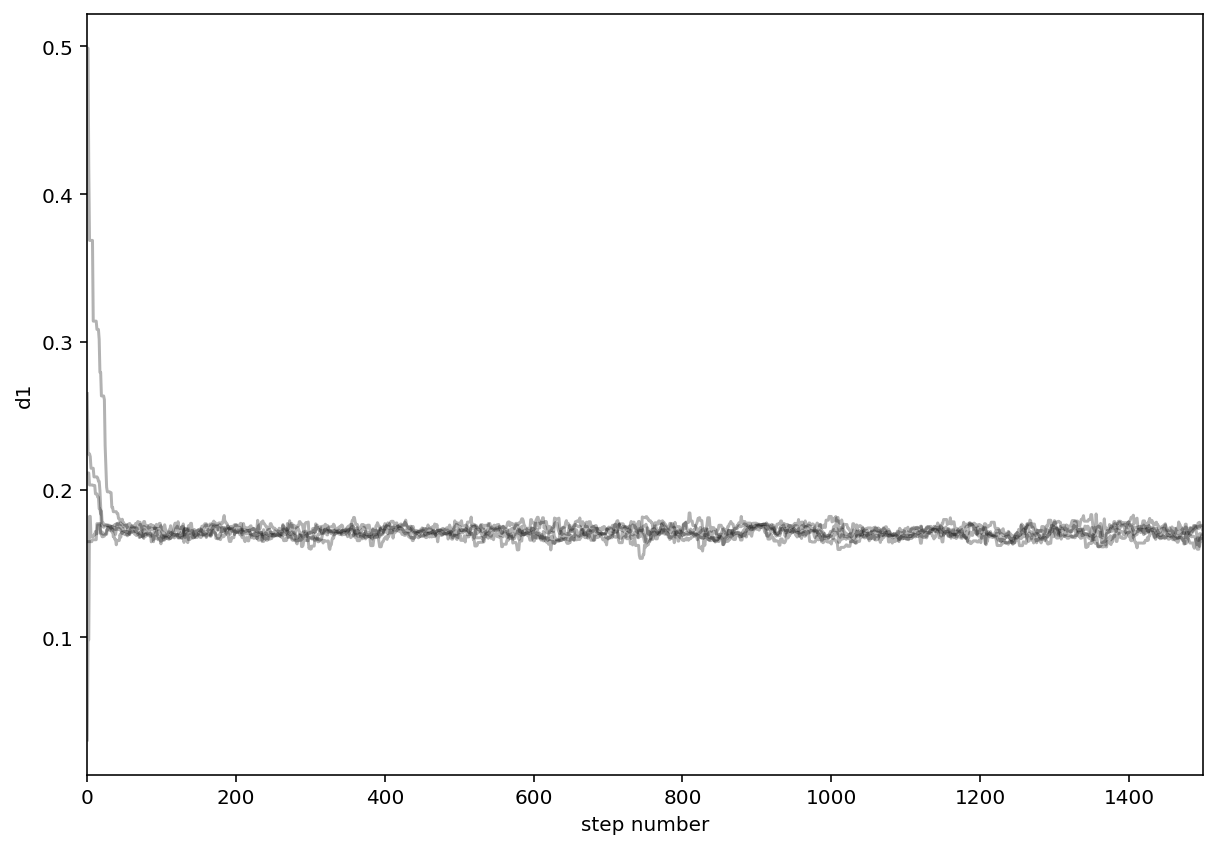

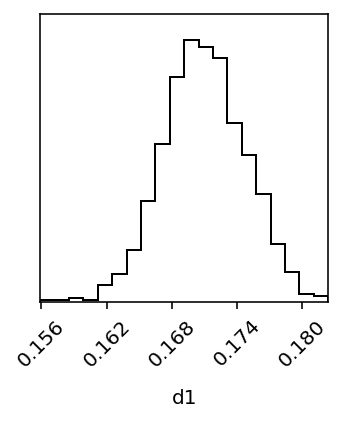

In [4]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.inference import py_inference
import numpy as np
import pylab as plt
import pandas as pd
# Import a bioscrape/SBML model
M = Model(sbml_filename = 'toy_sbml_model.xml')
# Import data from CSV
# Import a CSV file for each experiment run
df = pd.read_csv('test_data.csv', delimiter = '\t', names = ['X','time'], skiprows = 1)
M.set_species({'X':df['X'][0]})

# Create prior for parameters
prior = {'d1' : ['gaussian', 0.2, 200, 'positive']}
sampler, pid = py_inference(Model = M, exp_data = df, measurements = ['X'], time_column = ['time'],
            nwalkers = 5, init_seed = 0.15, nsteps = 1500, sim_type = 'deterministic',
            params_to_estimate = ['d1'], prior = prior)


# Using uniform priors and estimating both `k1` and `d1`
## and use the pid => parameter inference object directly.

  0%|                                                                                         | 0/5500 [00:00<?, ?it/s]C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\emcee\moves\red_blue.py:97: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|█████████████████████████████████████████████████████████████████████████████| 5500/5500 [00:39<00:00, 140.58it/s]


Successfully completed MCMC parameter identification procedure. Parameter distribution data written to mcmc_results.csv file. Check the MCMC diagnostics to evaluate convergence.
{'Autocorrelation time for each parameter': array([63.98065496, 63.52933488]), 'Acceptance fraction (fraction of steps that were accepted)': array([0.68418182, 0.64309091, 0.65472727, 0.64636364, 0.65545455,
       0.65254545, 0.63745455, 0.654     , 0.64618182, 0.65672727,
       0.64309091, 0.63163636, 0.62509091, 0.62745455, 0.63872727,
       0.66436364, 0.64236364, 0.63763636, 0.64236364, 0.66709091])}
Parameter posterior distribution convergence plots:


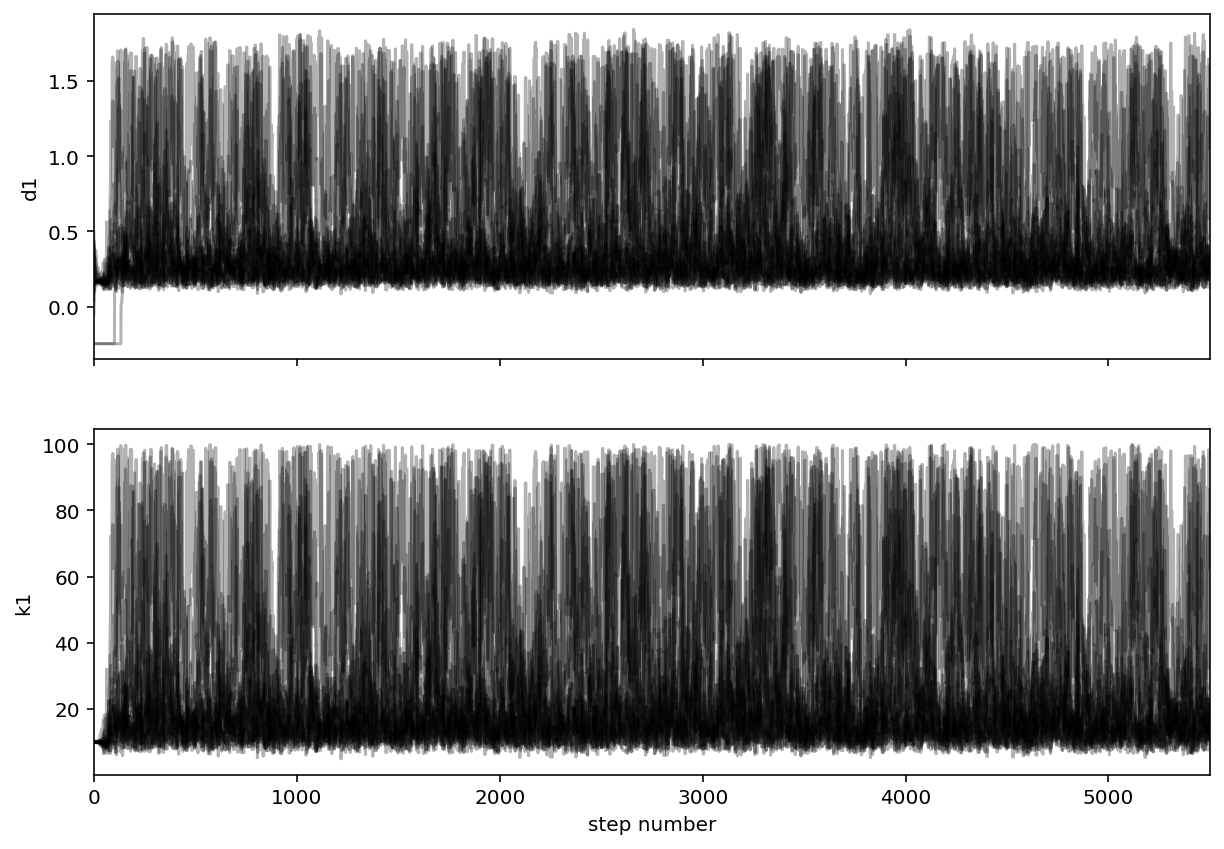

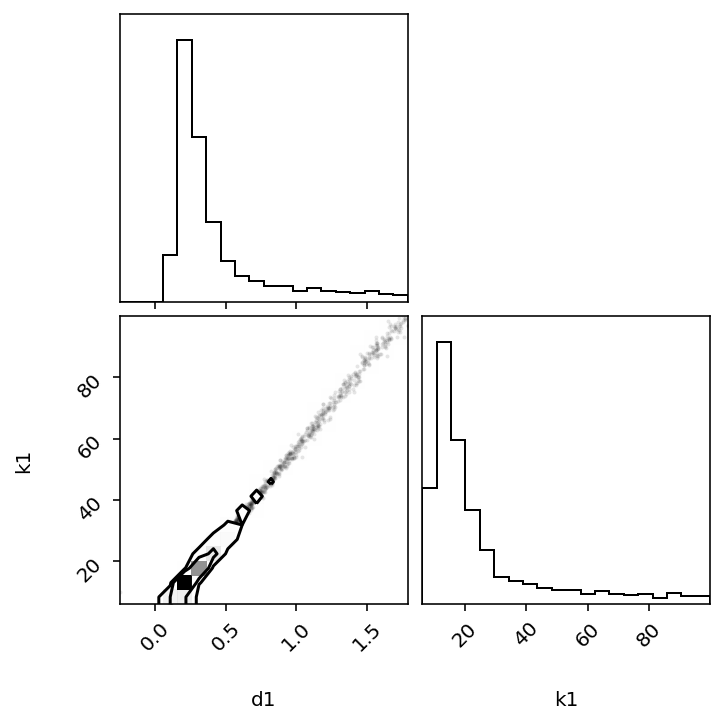

In [5]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.inference import py_inference

import numpy as np
import pylab as plt
import pandas as pd
# Import a bioscrape/SBML model
M = Model(sbml_filename = 'toy_sbml_model.xml')
# Import data from CSV
# Import a CSV file for each experiment run
df = pd.read_csv('test_data.csv', delimiter = '\t', names = ['X','time'], skiprows = 1)
M.set_species({'X':df['X'][0]})

prior = {'d1' : ['uniform', 0, 10], 'k1' : ['uniform', 0, 100]}

sampler, pid = py_inference(Model = M, exp_data = df, measurements = ['X'], time_column = ['time'],
            nwalkers = 20, init_seed = 0.15, nsteps = 5500, sim_type = 'deterministic',
            params_to_estimate = ['d1', 'k1'], prior = prior)


## Custom prior example:

Let us create our own custom prior for a reciprocal distribution, for which the pdf is given by:
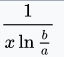
Refer https://en.wikipedia.org/wiki/Reciprocal_distribution for more details.

In [15]:
def my_own_custom_prior(param_name, param_value):
    '''
    Returns log-probability using a new custom prior.
    This particular example implements a Gaussian prior
    '''
    # sanity check
    if param_value <= 0 :
        return np.Inf
    # Create a dictionary with parameters (if any) needed to compute prior
#     {'parameter_name':[parameter1, parameter2,...]}
    prior_dict = {'d1': [0.01, 10],'k1':[0.1, 100]}
#     then use,
#     param1 = prior_dict[param_name][0]
    # and so on...
    a = prior_dict[param_name][0]
    b = prior_dict[param_name][1]
    # calculate probability p
    p = 1 / (param_value * np.log(b/a))
    if np.isnan(p):
        return -np.Inf
    return p

# Try it out using a simple example

In [19]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.inference import py_inference

import numpy as np
import pylab as plt
import pandas as pd
# Import a bioscrape/SBML model
M = Model(sbml_filename = 'toy_sbml_model.xml')
# Import data from CSV
# Import a CSV file for each experiment run
df = pd.read_csv('test_data.csv', delimiter = '\t', names = ['X','time'], skiprows = 1)
M.set_species({'X':df['X'][0]})

# The prior dictionary will have keys as each parameter to be estimated.
# The value corresponding to each parameter key is a list. The first element of the list 
# has to be 'custom' to specify that a custom function will be used as a prior
# The custom prior function needs to be the last element of the list. All other elements of the list 
# may contain any other parameters as desired

prior = {'d1' : ['custom', my_own_custom_prior], 'k1' : ['custom', my_own_custom_prior]}

sampler, pid = py_inference(Model = M, exp_data = df, measurements = ['X'], time_column = ['time'],
            nwalkers = 20, init_seed = 0.15, nsteps = 1500, sim_type = 'deterministic',
            params_to_estimate = ['d1', 'k1'], prior = prior, convergence_check = False, plot_show = False)


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:08<00:00, 169.87it/s]


Successfully completed MCMC parameter identification procedure. Parameter distribution data written to mcmc_results.csv file
